# Practica 4

## Importar

In [52]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format

In [53]:
liga = '/home/ef/Documents/Diplomado/data/'
df = pd.read_csv(liga + 'hombre_mujer_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Marca temporal                                      46 non-null     object 
 1   Pares de zapatos                                    46 non-null     float64
 2   Número de selfies en promedio a la semana           46 non-null     int64  
 3   Temperatura del agua al bañarte                     46 non-null     object 
 4   ¿Te gusta bailar?                                   46 non-null     object 
 5   Tiempo en bañarse minutos                           46 non-null     int64  
 6   Número de amigos en Facebook                        46 non-null     int64  
 7   Horas de sueño diarias                              46 non-null     float64
 8   Porcentaje de batería (0-100)                       46 non-null     int64  
 9   G

In [54]:
df = df.iloc[:,1:]

In [55]:
df.isnull().sum() /len(df)

Pares de zapatos                                     0.00
Número de selfies en promedio a la semana            0.00
Temperatura del agua al bañarte                      0.00
¿Te gusta bailar?                                    0.00
Tiempo en bañarse minutos                            0.00
Número de amigos en Facebook                         0.00
Horas de sueño diarias                               0.00
Porcentaje de batería (0-100)                        0.00
Género de película                                   0.00
¿Cuántas chelas te tomas por salida? (de cuartito)   0.00
Número de piercings                                  0.00
Género                                               0.00
dtype: float64

In [56]:
df.describe([i/10 for i in range(10)] + [.01,.99])

,Pares de zapatos,Número de selfies en promedio a la semana,Tiempo en bañarse minutos,Número de amigos en Facebook,Horas de sueño diarias,Porcentaje de batería (0-100),¿Cuántas chelas te tomas por salida? (de cuartito),Número de piercings
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,14.02,4.61,15.54,556.33,6.71,56.37,4.78,0.48
std,10.02,15.13,6.32,457.74,1.01,30.98,3.85,1.07
min,2.00,0.00,5.00,60.00,5.00,0.00,0.00,0.00
0%,2.00,0.00,5.00,60.00,5.00,0.00,0.00,0.00
1%,2.00,0.00,6.35,61.35,5.00,2.70,0.00,0.00
10%,3.00,0.00,10.00,100.00,6.00,16.00,0.00,0.00
20%,5.00,0.00,10.00,236.00,6.00,23.00,0.00,0.00
30%,7.25,0.00,10.00,294.00,6.00,29.50,2.50,0.00
40%,10.00,1.00,10.00,363.00,6.00,48.00,3.00,0.00


In [57]:
num = list(df.describe().columns)
cat = [x for x in df.columns if x not in num + ['Género']]
num

['Pares de zapatos',
 'Número de selfies en promedio a la semana',
 'Tiempo en bañarse minutos',
 'Número de amigos en Facebook',
 'Horas de sueño diarias',
 'Porcentaje de batería (0-100)',
 '¿Cuántas chelas te tomas por salida? (de cuartito)',
 'Número de piercings']

In [58]:
for col in cat:
    display(df[col].value_counts(1).reset_index())

,index,Temperatura del agua al bañarte
0,Caliente,0.52
1,Ambas,0.39
2,Fría,0.09


,index,¿Te gusta bailar?
0,Si,0.83
1,No,0.17


,index,Género de película
0,Terror,0.28
1,Comedia,0.28
2,Accion,0.26
3,Drama,0.17


In [59]:
for col in num:
    df[f'{col}_cut'] = pd.qcut(df[col], q = 5, duplicates = 'drop')

cut = [x for x in df.columns if x.endswith('_cut')]
df['Pares de zapatos_cut'].value_counts(1)

(5.0, 10.0]    0.33
(1.999, 5.0]   0.24
(24.0, 40.0]   0.20
(15.0, 24.0]   0.15
(10.0, 15.0]   0.09
Name: Pares de zapatos_cut, dtype: float64

In [60]:
df[df['Género'] == 1]['Pares de zapatos_cut'].value_counts(1)

(24.0, 40.0]   nan
(15.0, 24.0]   nan
(10.0, 15.0]   nan
(5.0, 10.0]    nan
(1.999, 5.0]   nan
Name: Pares de zapatos_cut, dtype: float64

In [61]:
df[df['Género'] == 0]['Pares de zapatos_cut'].value_counts(1)

(24.0, 40.0]   nan
(15.0, 24.0]   nan
(10.0, 15.0]   nan
(5.0, 10.0]    nan
(1.999, 5.0]   nan
Name: Pares de zapatos_cut, dtype: float64

In [62]:
aux = []
for x in df['Género']:
    if x == 'Hombre':
        aux.append(1)
    else:
        aux.append(0)
        
df['Género'] = aux

In [63]:
import pydotplus
import numpy as np
import pandas as pd
from sklearn.tree import _tree
from IPython.display import Image 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

In [64]:
from six import StringIO

In [65]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    features = ','.join(feature_names)
    print(f"def tree({features}):")

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [66]:
def classification_metrics(X, y, estimator):
    ls_scores_roc = cross_val_score(estimator=estimator, X=X, y=y, scoring="roc_auc", n_jobs=-1, cv=4)
    print(f"ROC media: {np.mean(ls_scores_roc):,.2f}, desviación estándar: {np.std(ls_scores_roc)}")

In [67]:
X = df[cat + cut]
y = df['Género']
y.value_counts(1)

1   0.57
0   0.43
Name: Género, dtype: float64

In [68]:
X.sample()

,Temperatura del agua al bañarte,¿Te gusta bailar?,Género de película,Pares de zapatos_cut,Número de selfies en promedio a la semana_cut,Tiempo en bañarse minutos_cut,Número de amigos en Facebook_cut,Horas de sueño diarias_cut,Porcentaje de batería (0-100)_cut,¿Cuántas chelas te tomas por salida? (de cuartito)_cut,Número de piercings_cut
20,Caliente,Si,Terror,"(15.0, 24.0]","(5.0, 100.0]","(4.999, 10.0]","(750.0, 2600.0]","(6.0, 7.0]","(87.0, 100.0]","(8.0, 15.0]","(-0.001, 4.0]"


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [70]:
X_train.shape, X_test.shape

((41, 11), (5, 11))

In [71]:
y_train.shape, y_test.shape

((41,), (5,))

## Modelado

In [72]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[cat + cut])

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [73]:
tree = DecisionTreeClassifier()
pipe = Pipeline([("encoder", ohe), ("tree", tree)])
pipe.fit(X_train, y_train)
display(pipe.score(X_train, y_train))
pipe.score(X_test, y_test)

1.0

0.2

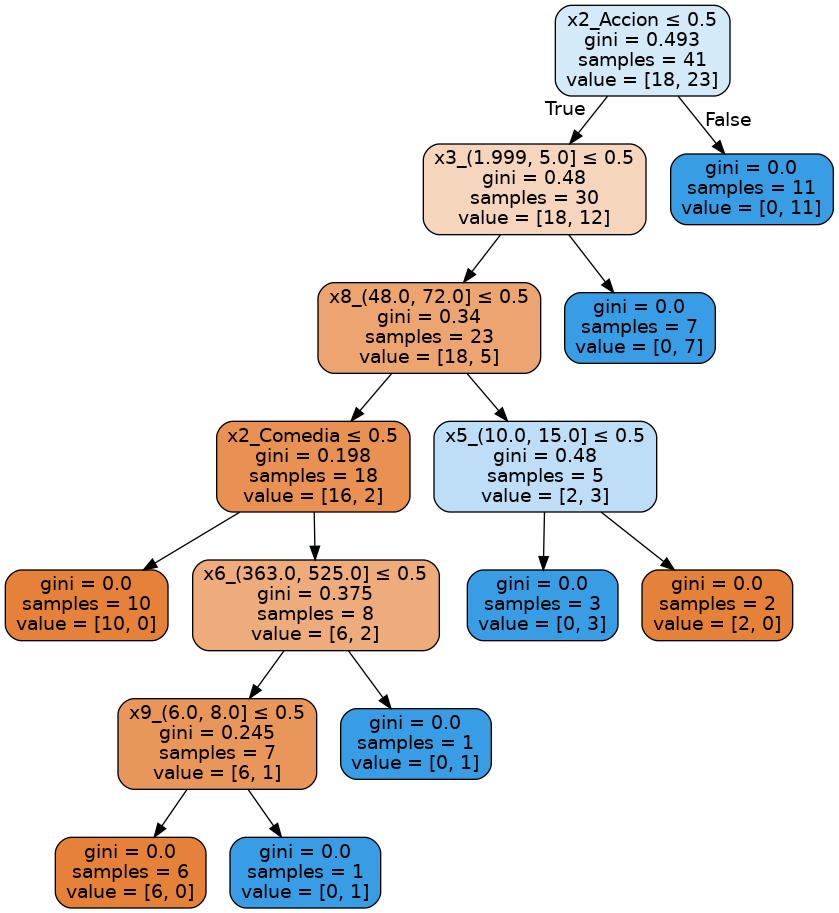

In [74]:
from six import StringIO
dot_data = StringIO()
export_graphviz(pipe["tree"], out_file=dot_data, feature_names=ohe.get_feature_names(),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [75]:
X_train.sample()

,Temperatura del agua al bañarte,¿Te gusta bailar?,Género de película,Pares de zapatos_cut,Número de selfies en promedio a la semana_cut,Tiempo en bañarse minutos_cut,Número de amigos en Facebook_cut,Horas de sueño diarias_cut,Porcentaje de batería (0-100)_cut,¿Cuántas chelas te tomas por salida? (de cuartito)_cut,Número de piercings_cut
17,Ambas,Si,Drama,"(24.0, 40.0]","(-1e-15, 1.0]","(15.0, 20.0]","(59.999, 236.0]","(4.999, 6.0]","(48.0, 72.0]","(6.0, 8.0]","(-0.001, 4.0]"


In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 4 to 32
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Temperatura del agua al bañarte                         41 non-null     object  
 1   ¿Te gusta bailar?                                       41 non-null     object  
 2   Género de película                                      41 non-null     object  
 3   Pares de zapatos_cut                                    41 non-null     category
 4   Número de selfies en promedio a la semana_cut           41 non-null     category
 5   Tiempo en bañarse minutos_cut                           41 non-null     category
 6   Número de amigos en Facebook_cut                        41 non-null     category
 7   Horas de sueño diarias_cut                              41 non-null     category
 8   Porcentaje de batería (0-100)_cu

In [77]:
print(tree_to_code(feature_names=ohe.get_feature_names(), tree=tree))

def tree(x0_Ambas,x0_Caliente,x0_Fría,x1_No,x1_Si,x2_Accion,x2_Comedia,x2_Drama,x2_Terror,x3_(1.999, 5.0],x3_(5.0, 10.0],x3_(10.0, 15.0],x3_(15.0, 24.0],x3_(24.0, 40.0],x4_(-1e-15, 1.0],x4_(1.000000000000004, 5.0],x4_(5.0, 100.0],x5_(4.999, 10.0],x5_(10.0, 15.0],x5_(15.0, 20.0],x5_(20.0, 30.0],x6_(59.999, 236.0],x6_(236.0, 363.0],x6_(363.0, 525.0],x6_(525.0, 750.0],x6_(750.0, 2600.0],x7_(4.999, 6.0],x7_(6.0, 7.0],x7_(7.0, 8.0],x7_(8.0, 9.0],x8_(-0.001, 23.0],x8_(23.0, 48.0],x8_(48.0, 72.0],x8_(72.0, 87.0],x8_(87.0, 100.0],x9_(-0.001, 3.0],x9_(3.0, 6.0],x9_(6.0, 8.0],x9_(8.0, 15.0],x10_(-0.001, 4.0]):
  if x2_Accion <= 0.5:
    if x3_(1.999, 5.0] <= 0.5:
      if x8_(48.0, 72.0] <= 0.5:
        if x2_Comedia <= 0.5:
          return [[10.  0.]]
        else:  # if x2_Comedia > 0.5
          if x6_(363.0, 525.0] <= 0.5:
            if x9_(6.0, 8.0] <= 0.5:
              return [[6. 0.]]
            else:  # if x9_(6.0, 8.0] > 0.5
              return [[0. 1.]]
          else:  # if x6_(3

In [78]:
pipe.score(X_test, y_test)

0.2

In [79]:
X["proba"] = pipe.predict_proba(X)[:, 0]
aux = pd.DataFrame(zip(ohe.get_feature_names(X_train.columns), 
                       tree.feature_importances_)).sort_values(by=1, ascending = False)

<ipython-input-79-1212e6d56061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["proba"] = pipe.predict_proba(X)[:, 0]


In [80]:
aux.reset_index(drop = True, inplace = True)
aux.iloc[:12,:]

,0,1
0,"Pares de zapatos_cut_(1.999, 5.0]",0.33
1,Género de película_Accion,0.29
2,"Tiempo en bañarse minutos_cut_(10.0, 15.0]",0.12
3,"Porcentaje de batería (0-100)_cut_(48.0, 72.0]",0.09
4,¿Cuántas chelas te tomas por salida? (de cuart...,0.08
5,"Número de amigos en Facebook_cut_(363.0, 525.0]",0.06
6,Género de película_Comedia,0.03
7,¿Cuántas chelas te tomas por salida? (de cuart...,0.00
8,"Porcentaje de batería (0-100)_cut_(87.0, 100.0]",0.00
9,¿Cuántas chelas te tomas por salida? (de cuart...,0.00


In [82]:
val = pd.read_csv(liga + 'validate_hm.csv')
val

,Pares de zapatos,Número de selfies en promedio a la semana,Temperatura del agua al bañarte,¿Te gusta bailar?,Tiempo en bañarse minutos,Número de amigos en Facebook,Horas de sueño diarias,Porcentaje de batería (0-100),Género de película,¿Cuántas chelas te tomas por salida? (de cuartito),Número de piercings
0,4,0,Caliente,No,10,450,8,49,Drama,0,0
1,30,25,Ambas,Si,30,1167,6,71,Drama,6,2
2,12,1,Caliente,Si,20,"1,713",8,31,Comedia,0,0
3,4,1,Caliente,Si,10,1024,6,19,Terror,8,0
4,12,0,Caliente,Si,30,300,6,54,Accion,0,0
5,20,15,Caliente,Si,20,319,8,93,Comedia,6,2


In [ ]:
1	H
2	M
3	M
4	H
5	H
6	M

In [46]:
val.loc[2,'Número de amigos en Facebook'] = 1713
val['Número de amigos en Facebook'] =val['Número de amigos en Facebook'].astype(int)
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Pares de zapatos                                    6 non-null      int64 
 1   Número de selfies en promedio a la semana           6 non-null      int64 
 2   Temperatura del agua al bañarte                     6 non-null      object
 3   ¿Te gusta bailar?                                   6 non-null      object
 4   Tiempo en bañarse minutos                           6 non-null      int64 
 5   Número de amigos en Facebook                        6 non-null      int64 
 6   Horas de sueño diarias                              6 non-null      int64 
 7   Porcentaje de batería (0-100)                       6 non-null      int64 
 8   Género de película                                  6 non-null      object
 9   ¿Cuántas chela